<a href="https://colab.research.google.com/github/JimBartelli/School_Work/blob/main/SQC_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import math
import random
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [22]:


data = pd.read_csv('https://github.com/JimBartelli/School_Work/raw/main/SQC13.4.csv', sep=',', na_values=".")

data

,Speed,Hardness,Angle,Life
0,1,1,1,221
1,1,1,1,311
2,2,1,1,325
3,2,1,1,435
4,1,2,1,354
5,1,2,1,348
6,2,2,1,552
7,2,2,1,372
8,1,1,2,440
9,1,1,2,453


In [23]:
df=data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Speed     16 non-null     int64
 1   Hardness  16 non-null     int64
 2   Angle     16 non-null     int64
 3   Life      16 non-null     int64
dtypes: int64(4)
memory usage: 640.0 bytes


In [24]:
model = ols('Life ~ C(Speed) + C(Hardness) + C(Angle) + C(Speed):C(Hardness) + C(Speed):C(Angle) + C(Hardness):C(Angle) + C(Speed):C(Hardness):C(Angle)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Speed),132.25,1.0,0.032355,0.861724
C(Hardness),20592.25,1.0,5.037859,0.055036
C(Angle),28392.25,1.0,6.946116,0.029919
C(Speed):C(Hardness),2256.25,1.0,0.551988,0.478753
C(Speed):C(Angle),45582.25,1.0,11.151621,0.010240
C(Hardness):C(Angle),552.25,1.0,0.135107,0.722729
C(Speed):C(Hardness):C(Angle),1980.25,1.0,0.484465,0.506121
Residual,32700.00,8.0,NaN,NaN


Assuming a 95% confidence interval and an Alpha of 0.05, we can conclude that the factor of cutting angle is significant as well as the interaction of cutting angle and speed. Hardness would be significant at a slightly higher alpha, but it does not make the cut at alpha = 0.05

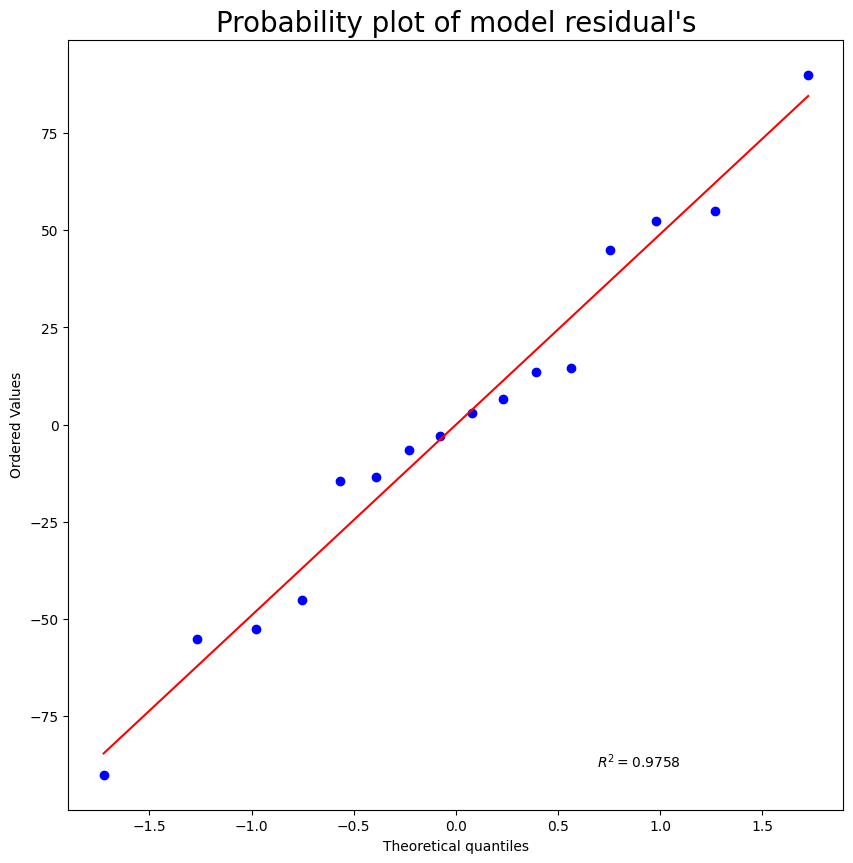

In [25]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

b)

We could use a boxplot here to visulaize the averages of the factor levels and find the combination with the highest average tool life, but given that each combination only has two data points and we can observe the results visually in the table, we can conlude that the comnbination with the longest average tool life is a=1, b=2, and c=2

c)

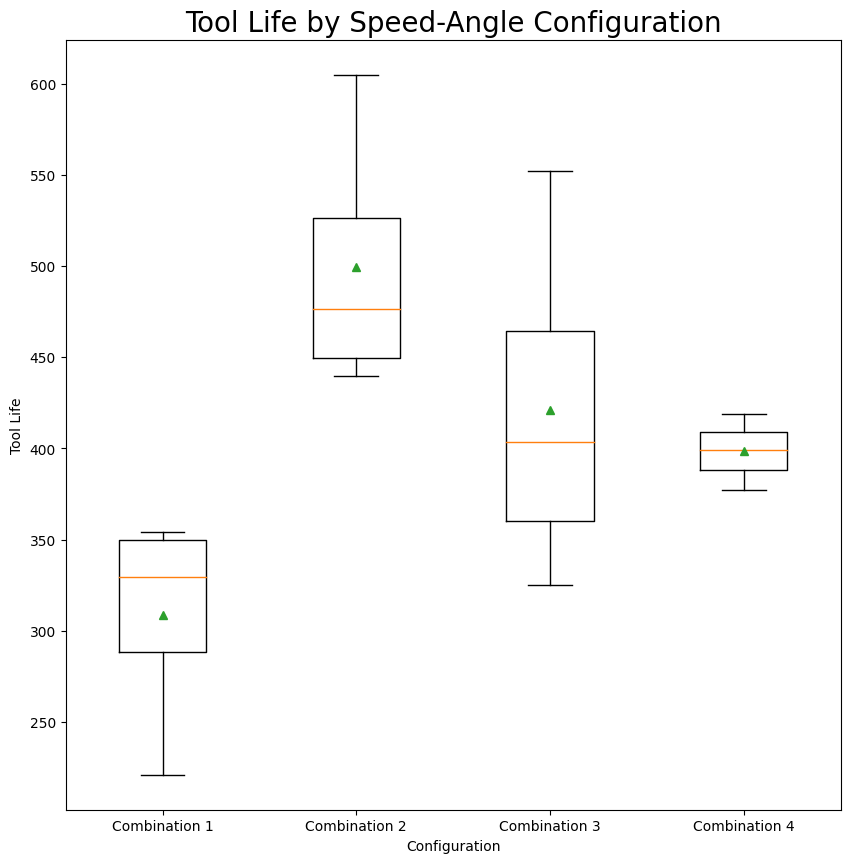

In [15]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Tool Life by Speed-Angle Configuration", fontsize= 20)
ax.set

data2 = [df['Life'][df['Speed'] == 1][df['Angle'] == 1],
         df['Life'][df['Speed'] == 1][df['Angle'] == 2],
         df['Life'][df['Speed'] == 2][df['Angle'] == 1],
         df['Life'][df['Speed'] == 2][df['Angle'] == 2]]


ax.boxplot(data2,
           labels= ['Combination 1', 'Combination 2', 'Combination 3', 'Combination 4'],
           showmeans= True)

plt.xlabel("Configuration")
plt.ylabel("Tool Life")

plt.show()

While configuration 4 has the least variance, Combination 2 (when the speed is set at level 1 and cutting angle is set at level 2) has the highest average tool life regardless of the metal hardness factor

Problem 13.6

In [16]:
data_2 = pd.read_csv('https://github.com/JimBartelli/School_Work/raw/main/SQC13.6.csv', sep=',', na_values=".")

data_2

,Sweet,Syrup,Carb,Temp,Score
0,1,1,1,1,188
1,1,1,1,1,195
2,2,1,1,1,172
3,2,1,1,1,180
4,1,2,1,1,179
5,1,2,1,1,187
6,2,2,1,1,185
7,2,2,1,1,178
8,1,1,2,1,175
9,1,1,2,1,180


In [26]:
df=data_2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sweet   32 non-null     int64
 1   Syrup   32 non-null     int64
 2   Carb    32 non-null     int64
 3   Temp    32 non-null     int64
 4   Score   32 non-null     int64
dtypes: int64(5)
memory usage: 1.4 KB


In [18]:
model = ols('Score ~ C(Sweet) + C(Syrup) + C(Carb) + C(Temp) + C(Sweet):C(Syrup) + C(Sweet):C(Carb) + C(Sweet):C(Temp) + C(Syrup):C(Carb) + C(Syrup):C(Temp) + C(Carb):C(Temp) + C(Sweet):C(Syrup):C(Carb) + C(Sweet):C(Syrup):C(Temp) + C(Sweet):C(Carb):C(Temp) + C(Syrup):C(Carb):C(Temp) + C(Sweet):C(Syrup):C(Carb):C(Temp)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Sweet),657.03125,1.0,22.729730,0.000210
C(Syrup),13.78125,1.0,0.476757,0.499790
C(Carb),57.78125,1.0,1.998919,0.176574
C(Temp),124.03125,1.0,4.290811,0.054847
C(Sweet):C(Syrup),132.03125,1.0,4.567568,0.048369
C(Sweet):C(Carb),3.78125,1.0,0.130811,0.722325
C(Sweet):C(Temp),38.28125,1.0,1.324324,0.266726
C(Syrup):C(Carb),2.53125,1.0,0.087568,0.771099
C(Syrup):C(Temp),0.28125,1.0,0.009730,0.922650
C(Carb):C(Temp),22.78125,1.0,0.788108,0.387824


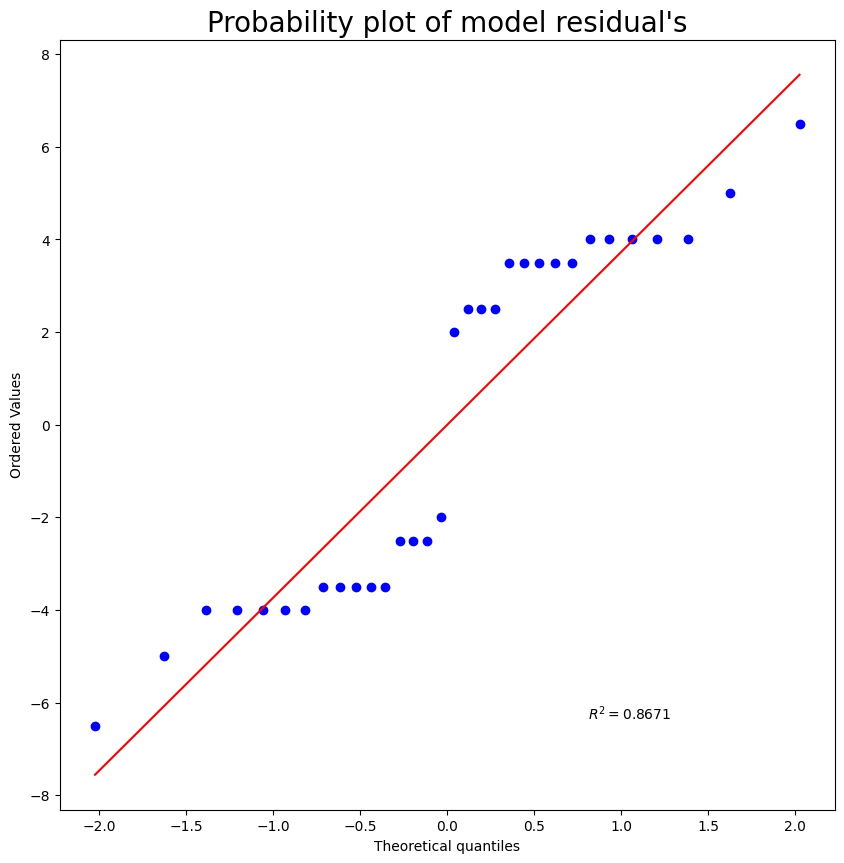

In [19]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

Normal Assumption isnt egregious but it isnt great either. We can't really say that it is normal.

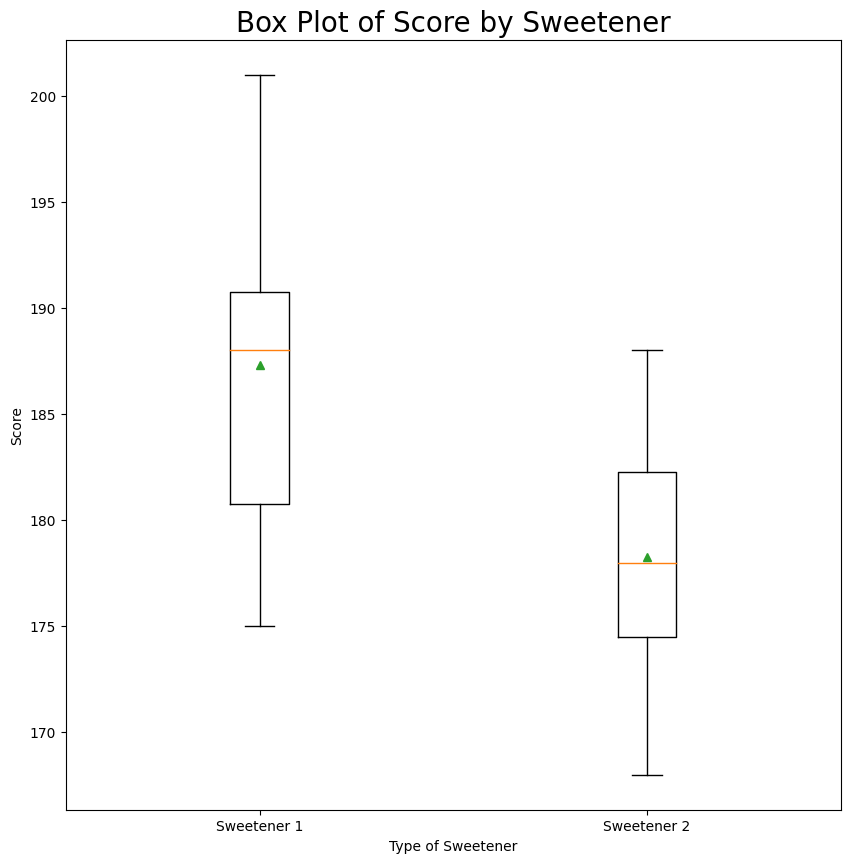

In [27]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Score by Sweetener", fontsize= 20)
ax.set

data3 = [df['Score'][df['Sweet'] == 1],
         df['Score'][df['Sweet'] == 2]]


ax.boxplot(data3,
           labels= ['Sweetener 1', 'Sweetener 2'],
           showmeans= True)

plt.xlabel("Type of Sweetener")
plt.ylabel("Score")

plt.show()

On average, there was a noticable preference for sweetener 1

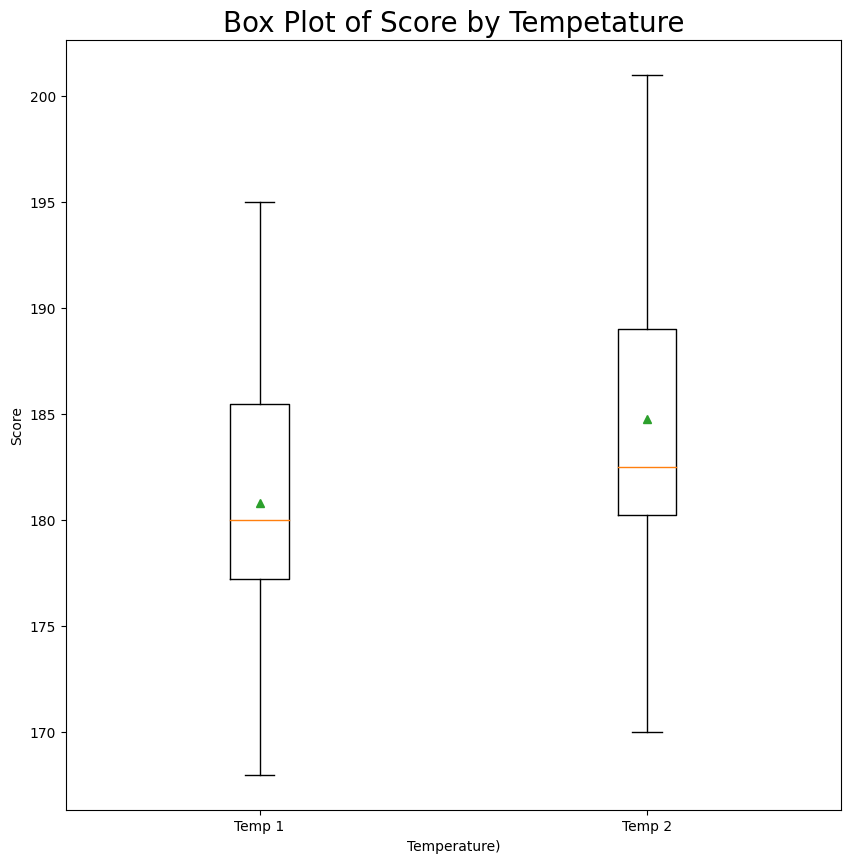

In [28]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Score by Tempetature", fontsize= 20)
ax.set

data4 = [df['Score'][df['Temp'] == 1],
         df['Score'][df['Temp'] == 2]]


ax.boxplot(data4,
           labels= ['Temp 1', 'Temp 2'],
           showmeans= True)

plt.xlabel("Temperature)")
plt.ylabel("Score")

plt.show()

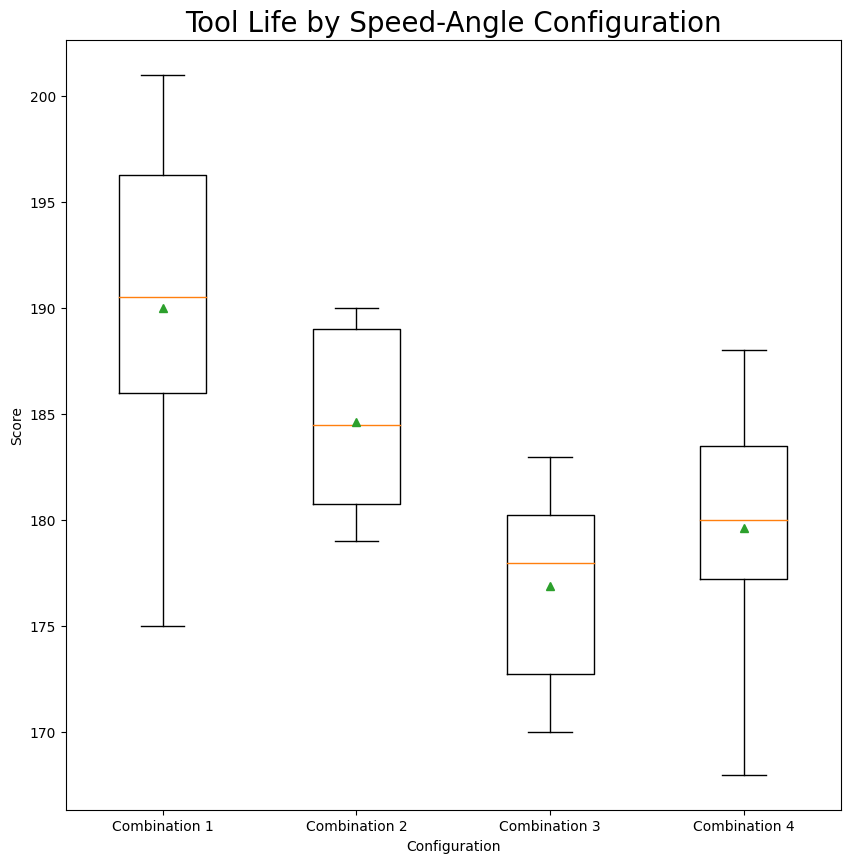

In [29]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Tool Life by Speed-Angle Configuration", fontsize= 20)
ax.set

data5 = [df['Score'][df['Sweet'] == 1][df['Syrup'] == 1],
         df['Score'][df['Sweet'] == 1][df['Syrup'] == 2],
         df['Score'][df['Sweet'] == 2][df['Syrup'] == 1],
         df['Score'][df['Sweet'] == 2][df['Syrup'] == 2]]


ax.boxplot(data5,
           labels= ['Combination 1', 'Combination 2', 'Combination 3', 'Combination 4'],
           showmeans= True)

plt.xlabel("Configuration")
plt.ylabel("Score")

plt.show()

The best combination ranked by score is sweetener 1 and syrup 1.

Most factors don't have a huge impact, but the big things to keep track of are the type of sweetener and temperature. Sweetener 1 is much preferred on average, and temp 2 is slighlty preferred. The other things to keep track of are the interactions of sweet and syrup, inlcuidng when sweet/syrup, sweet/syrup/carb, and sweet/syrup/temp. From what we can see with our data, the best combination so far is Sweetener 1, Syrup ratio 1, Carbonation level 1, and temperature 2. As our three box plots recommend, we use the preferred sweetener and temperature as well as the combination of sweetener 1 and syrup 1. In this case the preferred leaders of each individual statistical category are able to coexist in one solution which has the highest scoring sample data.